# Exercise session nº 1 
---
# Somites Patterning : Autoinhibition with Transcriptional Delay 

This subject is extracted from : 
> Julian Lewis, *Autoinhibition with Transcriptional Delay: A Simple Mechanism for the Zebrafish Somitogenesis Oscillator*, Current Biology, 2003.
> https://doi.org/10.1016/S0960-9822(03)00534-7

Somites are body segments containing the same internal structures. They can be observed at adult age in invertebrates such as earthworms but can also be observed during the embryonic stages of vertebrates. This patterning of these somites is done by an autohibitory mechanism, where two linked genes, her1 and her7, codes for proteins that inhibits themselves, giving rise to oscillations in their expressions. The Delta-Notch signaling pathway provides synchronization of adjacent cells. 


![alt text](Images/somites.png "Title")

During these session, we will show how a simple mechanical model can express these oscillations, and show that such a system can prove particularly robust, even to noise, and give the same phenotype with very different biological parameters.

---

## I - The single-cell single-gene oscillator

The simplest possibility one might envisage would be a feedback loop in which her1 or her7 protein directly binds to the regulatory DNA of its own gene to inhibit transcription. The delay T is linked to the production of biological material.

![alt text](Images/Oscillations.png "subtitle")

We note : $m(t)$ the quantity of mRNA of her1 at time t, and $p(t)$ the quantity of protein her1 at time t. 

In our situation, however, there are two delays : $T_m$, the time necessary to produce mature mRNAs, and $T_p$, the time needed to translate these mRNAs into proteins. 

![alt text](Images/Biological_model.png "subtitle")

We note $b$ and $c$ the decay rates (inverse lifetimes) of $p$ and $m$. 

We thus obtain the following system of coupled differential equations : 

$\dfrac{dp(t)}{dt} = am(t-T_p) - bp(t)$

$\dfrac{dm(t)}{dt} = f(p(t-T_m))-cm(t)$

We will chose $f(p)=\dfrac{k}{(\frac{p}{p_{crit}})^2+1}$, where k is the number of mRNA molecules synthetised without inhibition, and $p_{crit}$ is the concentration of protein which gives half-maximal inhibition. 

__These equations are numerically stable, they can be discretized using a forward euler-scheme__

#### **Question 1 :**
> Discretize these differential equations with a forward euler-scheme

Correction : 

$\dfrac{p(t+dt)-p(t)}{dt} = am(t-T_p) - bp(t) \Rightarrow  p(t+dt) = am(t-T_p)dt + p(t)(1-bdt)$

$\dfrac{m(t+dt)-m(t)}{dt} = f(p(t-T_m)) - bp(t) \Rightarrow m(t+dt) = f(p(t-T_m))dt + m(t)(1-cdt)$

#### **Question 2 :**
> Integrate these equations for t<tfinal. Try with a = 4.5, a = 1.5, a = 0.5. Which behaviours are induced by this change of parameter ? 
*Hint : Make use of a 1d linear interpolation to compute $m(t-T_p)$ and $p(t-T_m)$ *

__*Correction*__
The oscillations are damped with a = 0.5

In [1]:
# The following values are choosen from the mathematical analysis of the paper and is adapted for biological values of her7
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

tfinal = 500
dt = 0.2
Tm = 7.1 
Tp = 1.7

pcrit = 40
k = 33
f = lambda x : k / (1 + (x**2)/(pcrit**2))

a_values = [4.5,1.5,0.5]
a = a_values[0]
b=0.23
c=0.23

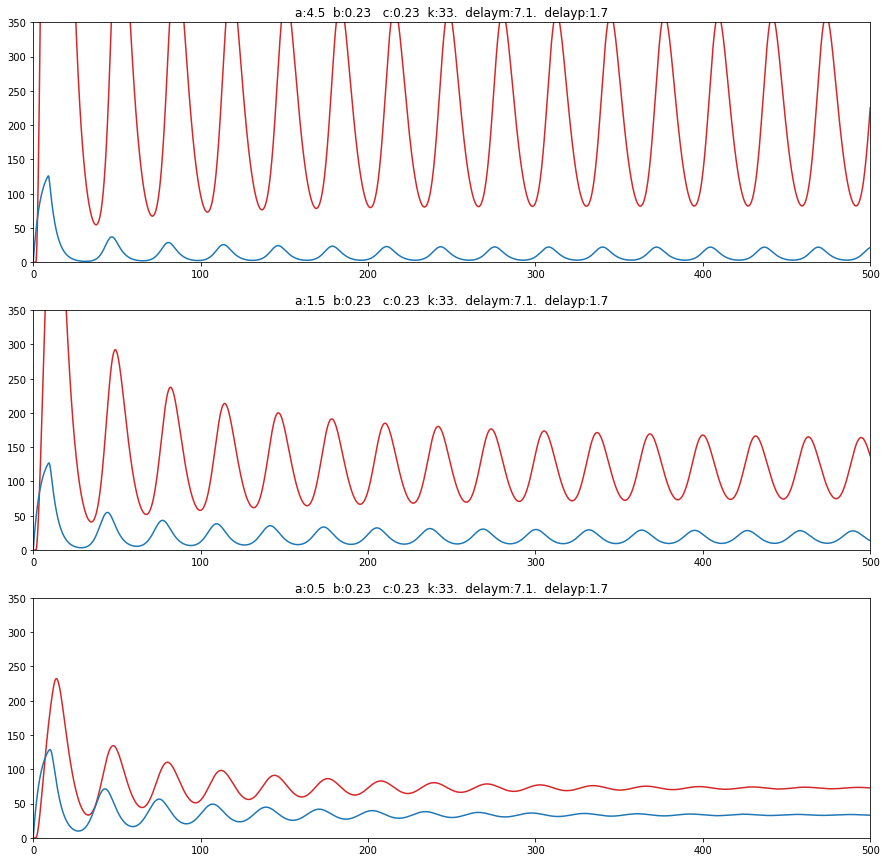

In [2]:
#Q2 : Correction :
#Forward euler derivation : 

nfinal = np.ceil(tfinal/dt)
npoints = int(nfinal)+1
timepoints = np.linspace(0,tfinal,npoints)

P = np.zeros(npoints)
M = np.zeros(npoints)

fig, ax = plt.subplots(3,1,figsize = (15,15))

for i,a in enumerate(a_values) : 

    for nt,t in enumerate(timepoints):
        if nt==0 : 
            continue

        if Tp < t : 
            m = interp1d(timepoints[:nt],M[:nt])
        else : 
            m = lambda x : 0

        if Tm < t : 
            p = interp1d(timepoints[:nt],P[:nt])
        else : 
            p = lambda x : 0


        P[nt]=dt*a*m(t-Tp) + P[nt-1]*(1-b*dt)
        M[nt]=dt*f(p(t-Tm))+ M[nt-1]*(1-c*dt)

    ax[i].plot(timepoints,P,'tab:red')
    ax[i].plot(timepoints,M,'tab:blue')
    ax[i].set_xlim(0,500)
    ax[i].set_ylim(0,350)
    ax[i].set_title("a:"+str(a)+"  b:0.23   c:0.23  k:33.  delaym:7.1.  delayp:1.7")



## II - Noisy Control of Gene expression

In any transcriptional control system, random fluctuations will arise from random variation, or noise, in the regulation of gene expression [31]. The binding and dissociation of a gene regulatory protein to and from its site on DNA are stochastic processes, each described by a certain probability of occurrence per unit time, so that we should expect her1 and her7 to flicker between “off” (repressor bound) and “on” (repressor dissociated) states. In writing down our deterministic equations that describe the gene regulation in terms of a smooth dependence of transcription rate on protein concentration, we are in effect assuming that we can replace the underlying on/off flickering behavior by an instantaneous time average, in which the rate of transcription is proportional to the fraction of time the gene is currently spending with repressor protein bound to it. The slower the average flicker rate, the more the real system will depart from the idealized deterministic behavior

We now add to our model the possibility for the protein to bind and unbind randomly from its DNA site. 
These binding rate is noted $k_{on}$ and the unbinding rate is noted $k_{off}$



### A - Haploid Expression

We define X[t] = number of gene copies that are free of repression at time t. It can be of value 0, 1 for and haploid cell.

Lets consider only one copy of the gene. 

We define $D(t)$ the probability that the gene is free of repression, i.e the probability that X(t) =1. 

### Question 3 : 
> Show that $\dfrac{dD}{dt} = k_{off}(1-D) - k_{on}D$

__*Correction*__

$D(t+dt) = \mathbb{P}(X(t+dt)=1) = \mathbb{P}(X(t+dt)=1|X(t)=0)\mathbb{P}(X(t)=0) + \mathbb{P}(X(t+dt)=1|X(t)=1)\mathbb{P}(X(t)=1) = koffdt(1-D(t)) + (1-\mathbb{P}(X(t+dt)=0|X(t)=1))D(t)$

$D(t+dt) = k_{off}dt(1-D(t)) + (1 - k_{on}dt) D(t) \Rightarrow \frac{D(t+dt) - D(t)}{dt} = k_{off}(1-D(t)) -k_{on} D(t) $


In the stochastic system, we assume that transcripts are initiated at zero rate when repressor is bound and at maximal rate when it is not bound. Then to make the correct correspondence between the noisy system and the deterministic system, we must have : 

$kD = f(p)=\dfrac{k}{(\frac{p}{p_{crit}})^2+1}$

Thus we need to have $k \dfrac{k_{off}}{k_{on}+k_{off}} =\dfrac{k}{(\frac{p}{p_{crit}})^2+1}$

Which gives the condition $k_{on} = k_{off}(\frac{p}{p_{crit}})^2.$

---

The time series $X(t)$ is a markov chain that is defined by the following transition probabilities (We will use the following notations : pij : probability that the state at time t+dt will be i (i.e. that X[t+dt]=i ) if the state at time t is j (i.e. that X[t]=j)): 

$\begin{align}
p_{00} & = \mathbb{P}(X(t+dt)=0|X(t)=0) = 1 - D(t+dt)_{|D(t) = 0} \newline
p_{10} & = \mathbb{P}(X(t+dt)=1|X(t)=0) = D(t+dt)_{|D(t) = 0} \newline
p_{01} & = \mathbb{P}(X(t+dt)=0|X(t)=1) = 1 - D(t+dt)_{|D(t) = 1} \newline
p_{11} & = \mathbb{P}(X(t+dt)=1|X(t)=1) = D(t+dt)_{|D(t) = 1} \newline
\end{align}$

If we write $u = \dfrac{k_{off}}{k_{on}+k_{off}}$ and $v = k_{on} + k_{off}$, we can rewrite, at first order : 

$D(t+dt) = u(1-e^{-vdt}) + D(t)e^{-vdt}$, thus :

$\begin{align}
p_{00} & = 1 - u(1-e^{-vdt}) \newline
p_{10} & = u(1-e^{-vdt}) \newline
p_{01} & = (1 - u)(1-e^{-vdt})\newline
p_{11} & = u(1-e^{-vdt}) + e^{-vdt} \newline
\end{align}$

We can simulate the stochastic process by assigning values to X at successive time points according to the above transition probability rule, and the stochastic system will then tend toward the behaviour of the deterministic continuum system in the limit of large kon and koff , where the rate of stochastic fluctuation (the rate of flickering) is very rapid in comparison with other variables such as the molecular lifetimes.

$p(t+dt) = am(t-T_p)dt + p(t)(1-bdt)$

$m(t+dt) = k_1(x(t-T_m))dt + m(t)(1-cdt)$



#### **Question 4 :**
> Integrate these equations for t<tfinal. Try with a = 4.5, a = 0.45, a = 0.225, a = 0.045. Which behaviours are induced by this change of parameter ? Compare with the one without noise. 

__*Correction*__
Fluctuations persists with values of a<0.5 with the noise while without noise the deterministic model predicts that these oscillations would be damped.

In [3]:
minute = 1
tfinal = 1000
dt = 0.1
Tm = 12
Tp = 2.8
pcrit = 40
k = 33
k1 = k/2 # k1 is the maximal rate of her1 mRNA synthesis per gene copy, i.e. number of transcripts initiated per unit time per gene copy when inhibitory complex is dissociated from the promote
koff = 1 #  off-rate for dissociation of inhibitory complex from promoter of her1 
kon = lambda p : koff* (p/pcrit)**2
nfinal = np.ceil(tfinal/dt)
npoints = int(nfinal)+1
f = lambda x : k / (1 + (x**2)/(pcrit**2))

def p00(u,v,dt) : 
    return(1 - u*(1-np.exp(-v*dt)))
def p10(u,v,dt) : 
    return(u*(1-np.exp(-v*dt)))
def p01(u,v,dt) : 
    return((1-u)*(1-np.exp(-v*dt)))
def p11(u,v,dt) : 
    return(u*(1-np.exp(-v*dt))+np.exp(-v*dt))

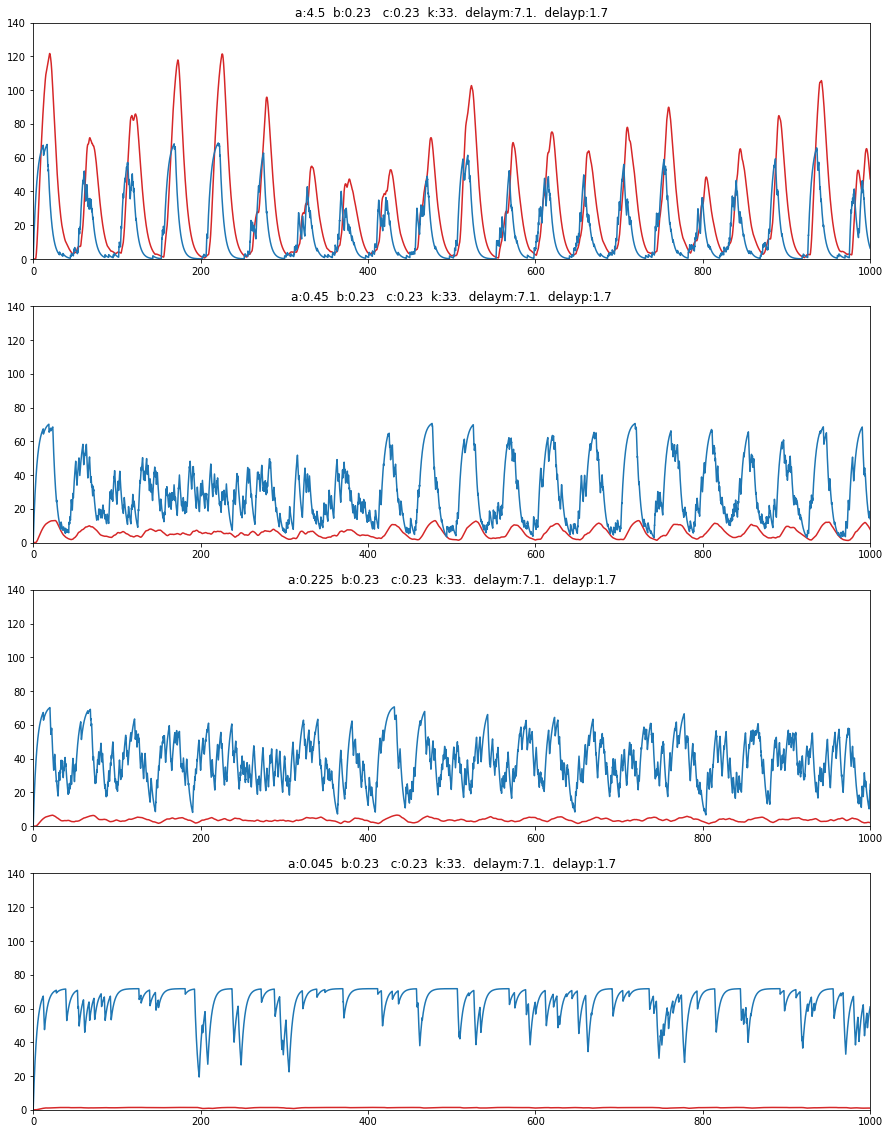

In [4]:
from scipy import interpolate
timepoints = np.linspace(0,tfinal,npoints)


fig, ax = plt.subplots(4,1,figsize = (15,20))

for i,a in enumerate([4.5,0.45,0.225,0.045]):
    P = np.zeros(npoints)
    M = np.zeros(npoints)
    X = np.zeros(npoints)
    for nt, t in enumerate(timepoints): 
        if t==0 : 
            continue

        if Tp < t : 
            m = interpolate.interp1d(timepoints[:nt],M[:nt])
        else : 
            m = lambda x : 0

        if Tm <t : 
            x = interpolate.interp1d(timepoints[:nt],X[:nt])
        else : 
            x = lambda x : 1

        P[nt] = P[nt-1] + dt*(a*m(t-Tp) - b*P[nt-1])
        M[nt] = M[nt-1] + dt*(k1*x(t-Tm)  -c*M[nt-1])

        v = kon(P[nt-1]) + koff
        u = koff/v

        r = np.random.rand()

        if X[nt-1] == 0 : 
            b1 = p00(u,v,dt)
        if X[nt-1] == 1 : 
            b1 = p01(u,v,dt)

        if r<b1 : 
            X[nt]=0
        else : 
            X[nt]=1
            
    ax[i].plot(timepoints,P/10,'tab:red')
    ax[i].plot(timepoints,M,'tab:blue')
    ax[i].set_xlim(0,1000)
    ax[i].set_ylim(0,140)
    ax[i].set_title("a:"+str(a)+"  b:0.23   c:0.23  k:33.  delaym:7.1.  delayp:1.7")

### B - Diploid Expression
We define XX[t] = number of gene copies that are free of repression at time t. It can be of value 0, 1, 2 for a diploid cell.
The time series $X(t)$ is a markov chain that is defined by transition probabilities (We will use the following notations : ppij : probability that the state at time t+dt will be i (i.e. that XX[t+dt]=i ) if the state at time t is j (i.e. that XX[t]=j)). They can be expressed from the haploid case

### Question 5 : 
> Express the diploid transition probabilities $ppij_{i,j \in (0,1,2)}$ from the haploid ones $pij_{i,j \in (0,1)}$

__*Correction*__

The binding/unbinding on each gene is independant of what happens on the other genes, thus :

$\begin{align}
pp00 &= p00*p00 \newline
pp10 &= 2 p10*p00 \newline
pp20 &= p10*p10 \newline
pp01 &= p01*p00 \newline
pp11 &= p11*p00 + p01*p10 \newline
pp21 &= p10*p11 \newline
pp02 &= p01*p01  \newline
pp12 &= 2 p01*p11 \newline
pp22 &= p11*p11 \newline
\end{align}$


#### **Question 6 :**
> Integrate these equations for t<tfinal. Try with a = 4.5, a = 0.45, a = 0.225, a = 0.045. Which behaviours are induced by this change of parameter ? How does the noise affects the presence of oscillations ?

__*Correction*__ 
When protein synthesis is attenuated severely, to the point where the deterministic system shows only damped oscillation, the noisy system does not tend to a steady state, but shows persistent strong fluctuations in the level of mRNA. A large random fluctuation can initiate a damped train of oscillations; although these are noisy, they still show the standard periodicity. Thus, oscillation continues but is episodic, with periods of regularity and high amplitude separated by intervals of more random fluctuation. In fact, when koff is made smaller, intensifying stochastic effects, the behavior approximates still more closely to sustained oscillation. Far from disrupting oscillation, noise helps it to occur.

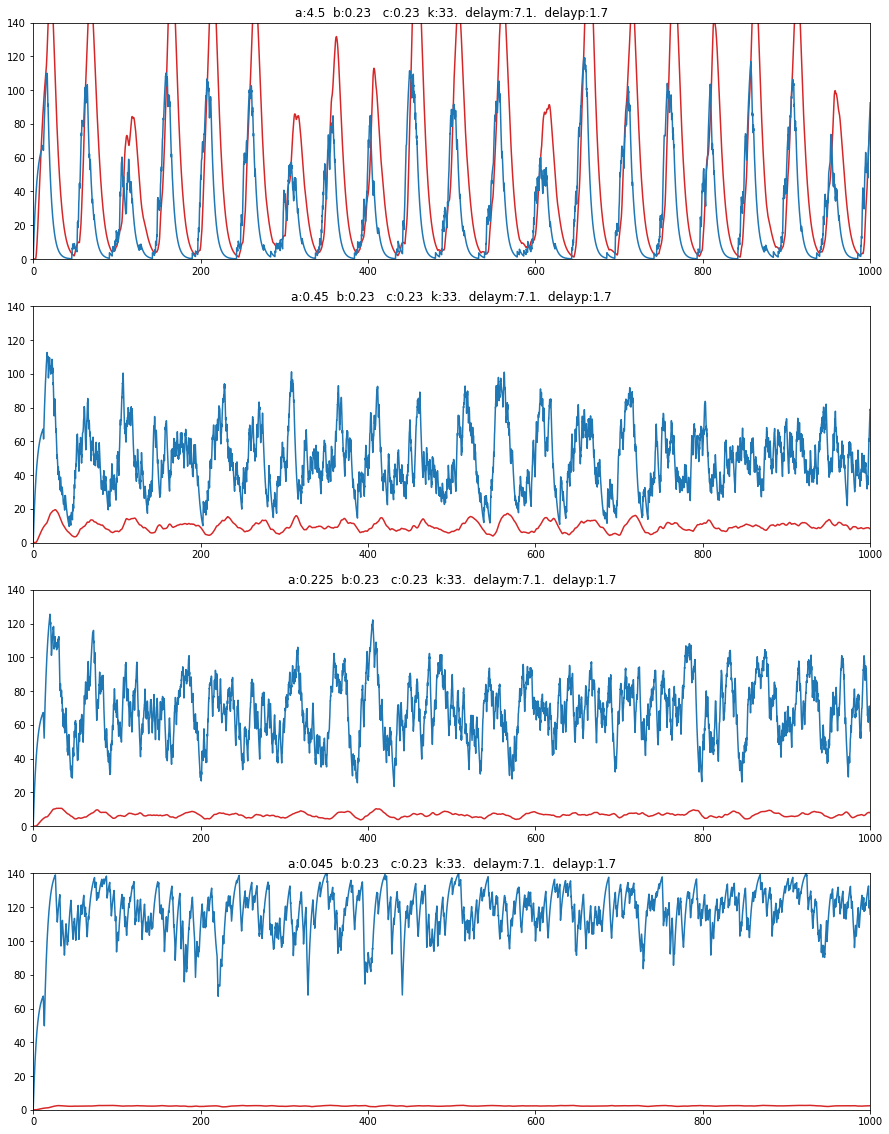

In [5]:
def pp00(u,v,dt):
    return(p00(u,v,dt)**2)
def pp10(u,v,dt):
    return(2*p10(u,v,dt)**p00(u,v,dt))
def pp20(u,v,dt):
    return(p10(u,v,dt)**2)
def pp01(u,v,dt):
    return(p01(u,v,dt)*p00(u,v,dt))
def pp11(u,v,dt):
    return(p11(u,v,dt)*p00(u,v,dt) + p01(u,v,dt)*p10(u,v,dt))
def pp21(u,v,dt):
    return(p10(u,v,dt)*p11(u,v,dt))
def pp02(u,v,dt):
    return(p01(u,v,dt)**2)
def pp12(u,v,dt):
    return(2*p01(u,v,dt)*p11(u,v,dt))
def pp22(u,v,dt):
    return(p11(u,v,dt)**2)


from scipy import interpolate
timepoints = np.linspace(0,tfinal,npoints)

#u = koff/(kon+koff)
#v = kon+kov


fig, ax = plt.subplots(4,1,figsize = (15,20))

for i,a in enumerate([4.5,0.45,0.225,0.045]):
    P = np.zeros(npoints)
    M = np.zeros(npoints)
    XX = np.zeros(npoints)
    for nt, t in enumerate(timepoints): 
        if t==0 : 
            continue

        if Tp < t : 
            m = interpolate.interp1d(timepoints[:nt],M[:nt])
        else : 
            m = lambda x : 0

        if Tm <t : 
            xx = interpolate.interp1d(timepoints[:nt],XX[:nt])
        else : 
            xx = lambda x : 1

        P[nt] = P[nt-1] + dt*(a*m(t-Tp) - b*P[nt-1])
        M[nt] = M[nt-1] + dt*(k1*xx(t-Tm)  -c*M[nt-1])

        v = kon(P[nt-1]) + koff
        u = koff/v

        r = np.random.rand()

        if XX[nt-1] == 0 : 
            b1 = pp00(u,v,dt)
            b2 = pp10(u,v,dt)
            #print(b1+b2+pp20(u,v,dt))
        if XX[nt-1] == 1 : 
            b1 = pp01(u,v,dt)
            b2 = pp11(u,v,dt)
        if XX[nt-1] == 2 : 
            b1 = pp02(u,v,dt)
            b2 = pp12(u,v,dt)

        if r<b1 : 
            XX[nt]=0
        elif r<b2 : 
            XX[nt]=1
        else : 
            XX[nt]=2
            
    ax[i].plot(timepoints,P/10,'tab:red')
    ax[i].plot(timepoints,M,'tab:blue')
    ax[i].set_xlim(0,1000)
    ax[i].set_ylim(0,140)
    ax[i].set_title("a:"+str(a)+"  b:0.23   c:0.23  k:33.  delaym:7.1.  delayp:1.7")

## III - Synchronisation of the oscillations through Delta-Notch pathway : The case of two coupled cells 


The author hypothesize that deltaC has a expression pattern as her1 and her7, as well as a similar lifetime, thus its production will oscillate as well. Delta ligands binds to the Notch receptor of neighboring cells (see figure), which activates a signaling pathway that stimulates the expression of her1/her7. We will see that the coupling of two cells with a slightly different oscillating period can be synchronized with this coupling. 

![alt text](Images/Synchronisation_tiny.png "subtitle")

In each of the two cells, the concentration of the proteins are governed by the following equations :

$
\begin{align}
\frac{dp_{her1}}{dt} & = a_{her1} m_{her1}(t-T_{pher1}) - b_{her1} p_{her1}(t) \newline
\frac{dp_{her7}}{dt} & = a_{her7} m_{her7}(t-T_{pher7}) - b_{her7} p_{her7}(t) \newline
\frac{dp_{delta}}{dt} & = a_{delta} m_{delta}(t-T_{delta}) - b_{delta} p_{delta}(t) \newline
\frac{dm_{her1}}{dt} & = f_{her1}(p_{her1},p_{her7},\tilde{p}_{delta})_{|t-T_{mher1}} - c_{her1}m_{her1}(t)\newline
\frac{dm_{her7}}{dt} & = f_{her7}(p_{her1},p_{her7},\tilde{p}_{delta})_{|t-T_{mher7}} - c_{her7}m_{her7}(t)\newline
\frac{dm_{delta}}{dt} & = f_{delta}(p_{her1},p_{her7},\tilde{p}_{delta})_{|t-T_{mdelta}} - c_{delta}m_{delta}(t) \newline
\end{align}
$

Where $\tilde{}$ indicates the concentration of the neighboring protein, and the functions are defined by : 

$
\begin{align}
f_{her1}(p_{her1},p_{her7},\tilde{p}_{delta}) &
= k_{her1} (r_0 + (1-r_0)\frac{\tilde{\phi}_d}{1+\tilde{\phi}_d}\frac{1}{1+\phi_{her1}\phi_{her7}}) \newline
f_{her7}(p_{her1},p_{her7},\tilde{p}_{delta}) &
= k_{her7} (r_0 + (1-r_0)\frac{\tilde{\phi}_d}{1+\tilde{\phi}_d}\frac{1}{1+\phi_{her1}\phi_{her7}}) \newline
f_{delta}(p_{her1},p_{her7},\tilde{p}_{delta}) &
= k_{delta} (s_h \frac{1}{1+\phi_{her1}\phi_{her7}}+ (1-s_h)\frac{\tilde{\phi}_d}{1+\tilde{\phi}_d}\frac{1}{1+\phi_{her1}\phi_{her7}})
\end{align}
$

Where $\phi_x$ is the reduced value of each protein concentration, where the concentrations are divided by their critical values. 

#### **Question 7 :**
> Integrate these equations for t<tfinal. Try to remove the coupling between the two cells. What do you observe ? 

In [6]:
#parameters :

minute = 1 
eps = 0.3
dt = eps
tfinal = 600 # Duration of the simulation
ah1,ah7,ad = [4.5]*3 # Protein synthesis rates per mRNA molecule for Her1, Her7 and Delta, for the two cells
bh1,bh7,bd = [0.23]*3 # Protein degradation rates : inverse lifetimes for Her1, Her7 and Delta
ch1,ch7,cd = [0.23]*3 # mRNA degradation rates : inverse lifetimes for Her1, Her7 and Delta
delaymh1 = 12*np.array([0.95,1.05])
delayph1 = 2.8*np.array([1,1])
delaymh7 = 7.1*np.array([0.95,1.05])
delayph7 = 1.7*np.array([1,1])
delaymd = 16*np.array([1,1])
delaypd = 20.5*np.array([1,1])

kh1 = 33
kh7 = 33
kd = 33
critph = 40 
critpd = 1000
r0 = 0.01
rh = 0 
rd = 0
rhd = 1- r0 -rh - rd
s0 = 0 
sh = 1
sd = 0 
shd = 1 - s0 - sh - sd

def fr(x1, x7, y) : 
    return (r0 + rd*y/(1+y) + rh* 1/(1+x1*x7) + rhd* (y/(1+y))*(1/(1+x1*x7)) )
def fs(x1,x7,y):
    return (s0 + sd*y/(1+y) + sh* 1/(1+x1*x7)  + shd*(y/(1+y))*(1/1+x1*x7) )

def fh1(xh1, xh7, yd):
    return kh1 * fr(xh1/critph, xh7/critph, yd/critpd)
def fh7(xh1, xh7, yd):
    return kh7 * fr(xh1/critph, xh7/critph, yd/critpd)
def fd(xh1, xh7, yd):
    return kd * fs(xh1/critph, xh7/critph, yd/critpd)

npoints = int(tfinal/eps)+1
timepoints = np.linspace(0,tfinal,npoints)

## Uncoupled case : 

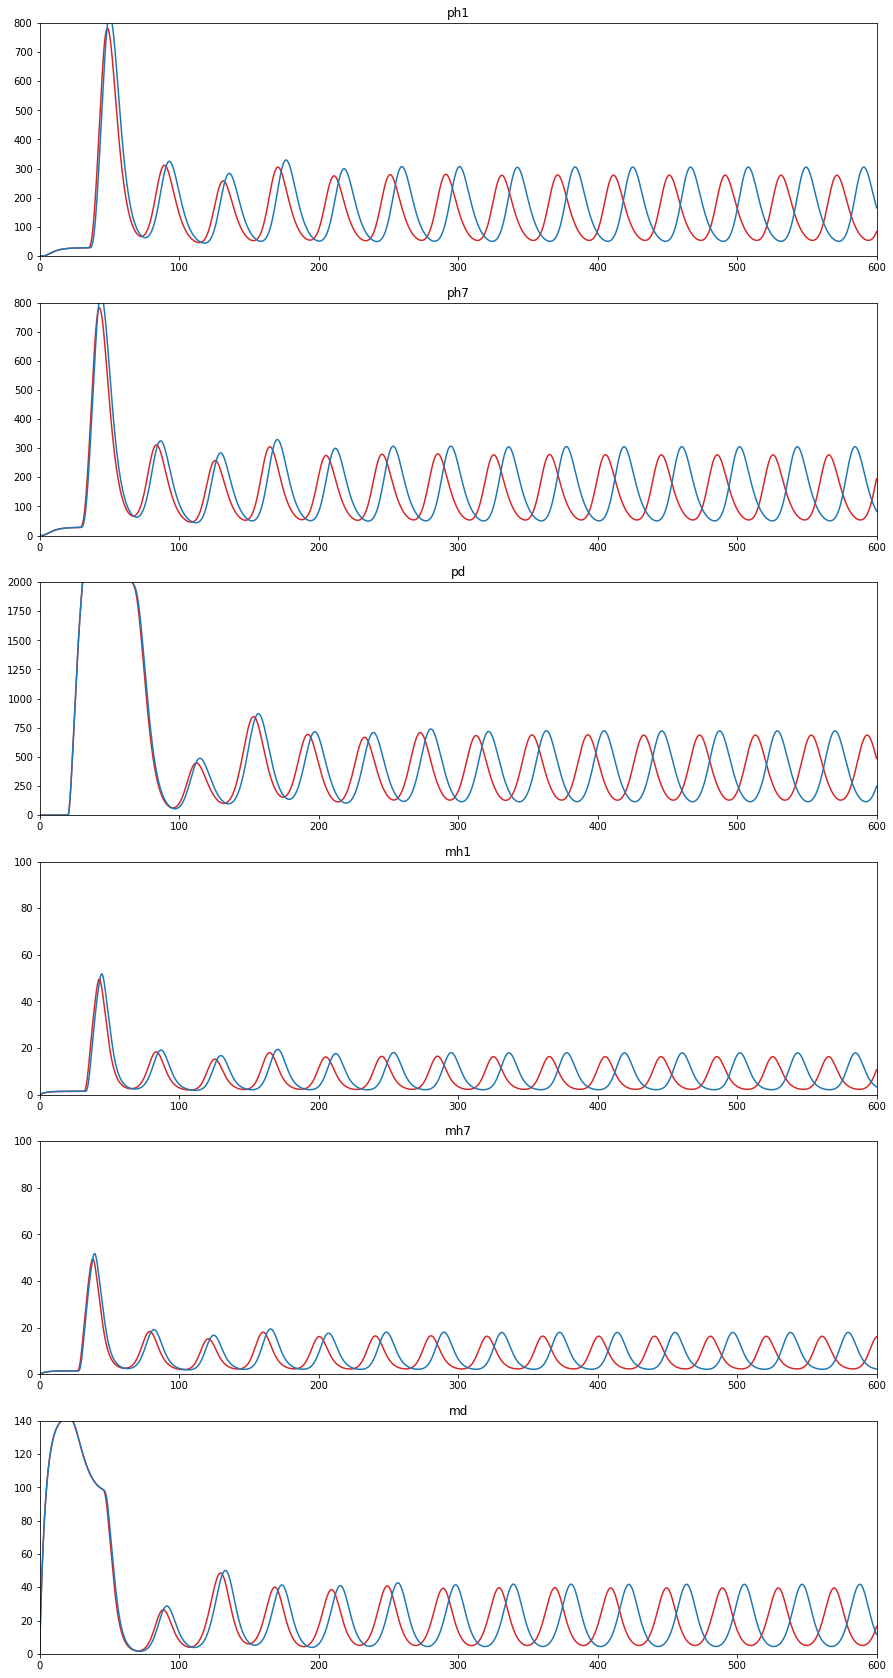

In [7]:
PH1 = {0:np.zeros(npoints),1:np.zeros(npoints)}
PH7 = {0:np.zeros(npoints),1:np.zeros(npoints)}
PD  = {0:np.zeros(npoints),1:np.zeros(npoints)}
MH1 = {0:np.zeros(npoints),1:np.zeros(npoints)}
MH7 = {0:np.zeros(npoints),1:np.zeros(npoints)}
MD  = {0:np.zeros(npoints),1:np.zeros(npoints)}
keyneighb = {0:0,1:1}
keys = [0,1]
for nt, t in enumerate(timepoints): 
    
    if t == 0 : continue
    
    for key in keys : 
        
        if delayph1[key]<t :
            mh1 = interpolate.interp1d(timepoints[:nt],MH1[key][:nt])
        else : mh1 = lambda x : 0

        PH1[key][nt] = PH1[key][nt-1]*(1-dt*bh1) + dt*ah1*mh1(t-delayph1[key])

        if delayph7[key]<t :
            mh7 = interpolate.interp1d(timepoints[:nt],MH7[key][:nt])
        else : mh7 = lambda x : 0

        PH7[key][nt] = PH7[key][nt-1]*(1-dt*bh7) + dt*ah7*mh7(t-delayph7[key])

        if delaypd[key]<t :
            md = interpolate.interp1d(timepoints[:nt],MD[key][:nt])
        else : md = lambda x : 0 

        PD[key][nt] = PD[key][nt-1]*(1-dt*bd) + dt*ad*md(t-delaypd[key])

        if delaymh1[key]<t :
            ph1 = interpolate.interp1d(timepoints[:nt],PH1[key][:nt])
            ph7 = interpolate.interp1d(timepoints[:nt],PH7[key][:nt])
            pd    = interpolate.interp1d(timepoints[:nt],PD[keyneighb[key]][:nt])
        else : 
            ph1 = lambda x : 0
            ph7 = lambda x : 0
            pd = lambda x : 0

        MH1[key][nt] = MH1[key][nt-1]*(1-dt*ch1) + dt*fh1(ph1(t-delaymh1[key]),ph7(t-delaymh1[key]),pd(t-delaymh1[key]))

        if delaymh7[key]<t :
            ph1 = interpolate.interp1d(timepoints[:nt],PH1[key][:nt])
            ph7 = interpolate.interp1d(timepoints[:nt],PH7[key][:nt])
            pd    = interpolate.interp1d(timepoints[:nt],PD[keyneighb[key]][:nt])
        else : 
            ph1 = lambda x : 0
            ph7 = lambda x : 0
            pd = lambda x : 0

        MH7[key][nt] = MH7[key][nt-1]*(1-dt*ch7) + dt*fh7(ph1(t-delaymh7[key]),ph7(t-delaymh7[key]),pd(t-delaymh7[key]))

        if delaymd[key]<t :
            ph1 = interpolate.interp1d(timepoints[:nt],PH1[key][:nt])
            ph7 = interpolate.interp1d(timepoints[:nt],PH7[key][:nt])
            pd    = interpolate.interp1d(timepoints[:nt],PD[keyneighb[key]][:nt])
        else : 
            ph1 = lambda x : 0
            ph7 = lambda x : 0
            pd = lambda x : 0

        MD[key][nt] = MD[key][nt-1]*(1-dt*cd) + dt*fd(ph1(t-delaymd[key]),ph7(t-delaymd[key]),pd(t-delaymd[key]))
        
dict_vals = {'ph1':PH1,'ph7':PH7,'pd':PD,'mh1':MH1,'mh7':MH7,'md':MD}
ylims = {'ph1':800,'ph7':800,'pd':2000,'mh1':100,'mh7':100,'md':140}
fig, ax = plt.subplots(len(dict_vals.keys()),1,figsize = (15,5*len(dict_vals.keys())))
for i, key in enumerate(dict_vals.keys()):
    ax[i].plot(timepoints,dict_vals[key][0],'tab:red')
    ax[i].plot(timepoints,dict_vals[key][1],'tab:blue')
    ax[i].set_xlim(0,600)
    ax[i].set_ylim(0,ylims[key])
    ax[i].set_title(key)

## Coupled case :

In [8]:
PH1 = {0:np.zeros(npoints),1:np.zeros(npoints)}
PH7 = {0:np.zeros(npoints),1:np.zeros(npoints)}
PD  = {0:np.zeros(npoints),1:np.zeros(npoints)}
MH1 = {0:np.zeros(npoints),1:np.zeros(npoints)}
MH7 = {0:np.zeros(npoints),1:np.zeros(npoints)}
MD  = {0:np.zeros(npoints),1:np.zeros(npoints)}
keyneighb = {0:1,1:0}
keys = [0,1]
for nt, t in enumerate(timepoints): 
    
    if t == 0 : continue
    
    for key in keys : 
        
        if delayph1[key]<t :
            mh1 = interpolate.interp1d(timepoints[:nt],MH1[key][:nt])
        else : mh1 = lambda x : 0

        PH1[key][nt] = PH1[key][nt-1]*(1-dt*bh1) + dt*ah1*mh1(t-delayph1[key])

        if delayph7[key]<t :
            mh7 = interpolate.interp1d(timepoints[:nt],MH7[key][:nt])
        else : mh7 = lambda x : 0

        PH7[key][nt] = PH7[key][nt-1]*(1-dt*bh7) + dt*ah7*mh7(t-delayph7[key])

        if delaypd[key]<t :
            md = interpolate.interp1d(timepoints[:nt],MD[key][:nt])
        else : md = lambda x : 0 

        PD[key][nt] = PD[key][nt-1]*(1-dt*bd) + dt*ad*md(t-delaypd[key])

        if delaymh1[key]<t :
            ph1 = interpolate.interp1d(timepoints[:nt],PH1[key][:nt])
            ph7 = interpolate.interp1d(timepoints[:nt],PH7[key][:nt])
            pd    = interpolate.interp1d(timepoints[:nt],PD[keyneighb[key]][:nt])
        else : 
            ph1 = lambda x : 0
            ph7 = lambda x : 0
            pd = lambda x : 0

        MH1[key][nt] = MH1[key][nt-1]*(1-dt*ch1) + dt*fh1(ph1(t-delaymh1[key]),ph7(t-delaymh1[key]),pd(t-delaymh1[key]))

        if delaymh7[key]<t :
            ph1 = interpolate.interp1d(timepoints[:nt],PH1[key][:nt])
            ph7 = interpolate.interp1d(timepoints[:nt],PH7[key][:nt])
            pd    = interpolate.interp1d(timepoints[:nt],PD[keyneighb[key]][:nt])
        else : 
            ph1 = lambda x : 0
            ph7 = lambda x : 0
            pd = lambda x : 0

        MH7[key][nt] = MH7[key][nt-1]*(1-dt*ch7) + dt*fh7(ph1(t-delaymh7[key]),ph7(t-delaymh7[key]),pd(t-delaymh7[key]))

        if delaymd[key]<t :
            ph1 = interpolate.interp1d(timepoints[:nt],PH1[key][:nt])
            ph7 = interpolate.interp1d(timepoints[:nt],PH7[key][:nt])
            pd    = interpolate.interp1d(timepoints[:nt],PD[keyneighb[key]][:nt])
        else : 
            ph1 = lambda x : 0
            ph7 = lambda x : 0
            pd = lambda x : 0

        MD[key][nt] = MD[key][nt-1]*(1-dt*cd) + dt*fd(ph1(t-delaymd[key]),ph7(t-delaymd[key]),pd(t-delaymd[key]))

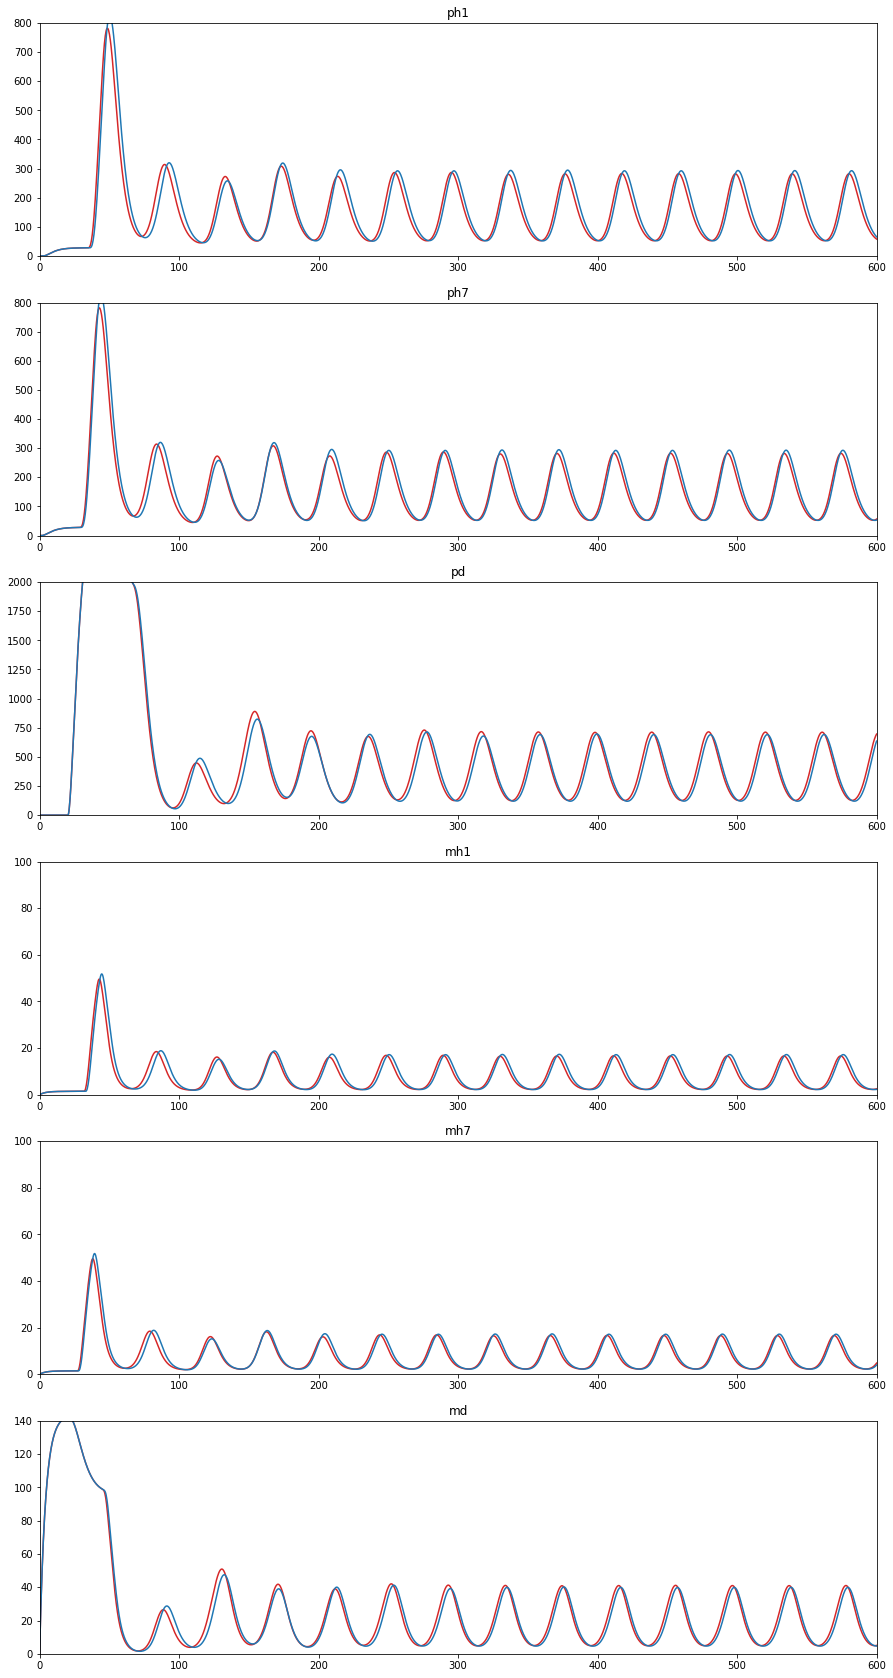

In [9]:
dict_vals = {'ph1':PH1,'ph7':PH7,'pd':PD,'mh1':MH1,'mh7':MH7,'md':MD}
ylims = {'ph1':800,'ph7':800,'pd':2000,'mh1':100,'mh7':100,'md':140}
fig, ax = plt.subplots(len(dict_vals.keys()),1,figsize = (15,5*len(dict_vals.keys())))
for i, key in enumerate(dict_vals.keys()):
    ax[i].plot(timepoints,dict_vals[key][0],'tab:red')
    ax[i].plot(timepoints,dict_vals[key][1],'tab:blue')
    ax[i].set_xlim(0,600)
    ax[i].set_ylim(0,ylims[key])
    ax[i].set_title(key)